### SIR Model Covid-19

*Author*: Simon Frost

*Date*: 2018-07-12

-- http://epirecip.es/epicookbook/chapters/sir/python

Modified for Covid-19 

*Author*: Marcello Perathoner

*Date*: 2020-03-14

## The SIR Model

The SIR model is one of the simplest compartmental models, and many models are derivations of this basic form. The model consists of three compartments: S for the number of susceptible, I for the number of infectious, and R for the number recovered (or immune) individuals. This model is reasonably predictive for infectious diseases which are transmitted from human to human, and where recovery confers lasting resistance, such as measles, mumps and rubella. -- https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model

In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import ode, solve_ivp

In [2]:
def sir_ode (times, init, parms):
    β, γ, N = parms
    S, I, R = init
    # ODEs (ordinary differential equations)
    F = β * I / N
    dS = -F * S
    dR =  γ * I
    dI = 0 - dS - dR
    return [dS, dI, dR]

## The Basic Reproduction Number

In epidemiology, the basic reproduction number (sometimes called basic reproductive ratio, or incorrectly basic reproductive rate, and denoted R0, pronounced R nought or R zero) of an infection can be thought of as the expected number of cases directly generated by one case in a population where all individuals are susceptible to infection. -- https://en.wikipedia.org/wiki/Basic_reproduction_number

The R0 of Covid-19 is estimated as: 1.4 – 3.9

R0 = β * γ

In [3]:
N = 60262701        # Italy: Population 60.262.701
S = 3               # Imported Infections 3

β = 1    # How many people does an I infect each day on average
γ = 2.5  # How many days I stays infectious

parms = [β, 1 / γ, N] 
init  = [N - S, S, 0]     # S, I, R
times = np.linspace (0, 100, 1001)

In [4]:
sir_sol = solve_ivp(fun=lambda t, y: sir_ode(t, y, parms), t_span=[min(times),max(times)], y0=init, t_eval=times)

In [5]:
sir_out = pd.DataFrame({"t":sir_sol["t"],"S":sir_sol["y"][0],"I":sir_sol["y"][1],"R":sir_sol["y"][2]})

#### Visualisation

In [6]:
import matplotlib.pyplot as plt

In [7]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (16,8)

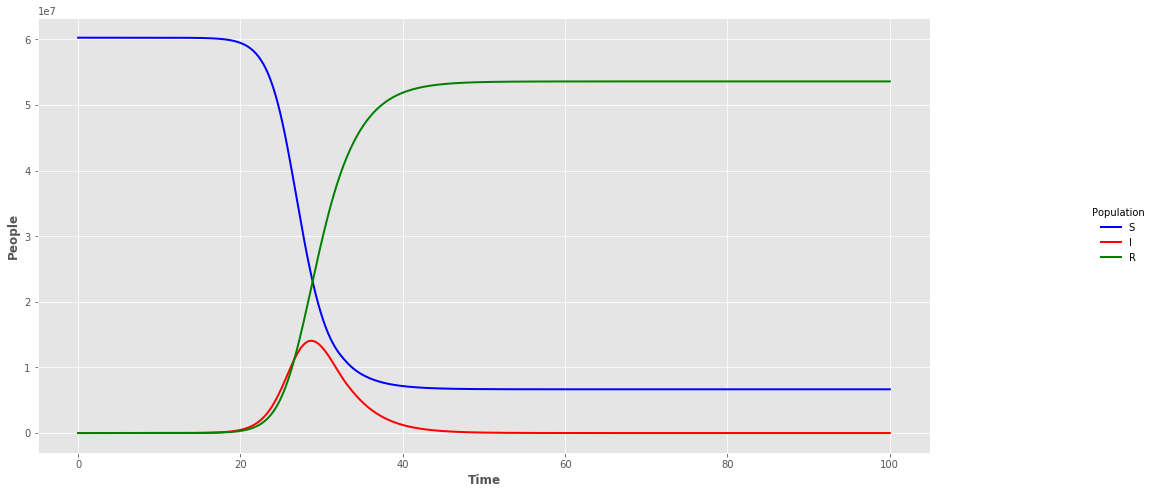

In [8]:
sline = plt.plot("t","S","", data=sir_out, color="blue",  linewidth=2)
iline = plt.plot("t","I","", data=sir_out, color="red",   linewidth=2)
rline = plt.plot("t","R","", data=sir_out, color="green", linewidth=2)
plt.xlabel("Time",fontweight="bold")
plt.ylabel("People",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)